In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import datetime as dt
import random
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



# Load the dataset


In [2]:
df_time= pd.read_csv("time_series_covid19_confirmed_global.csv")

df_time

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107
272,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048
273,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737
274,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,92920,93106,93201,93279,93428,93627,93947,94430,94751,95050


# Data Wrangling 


In [3]:
# Melt each date coloumns as rows
df=df_time.melt(id_vars=["Country/Region","Province/State","Lat","Long"], 
        var_name="Date", 
        value_name="Cases")
# select country
df=df[(df["Country/Region"] == "US")]
df=df.groupby([ "Date"], sort=False)['Cases'].agg('sum').reset_index()

df['Date'] =  pd.to_datetime(df['Date'])

<ipython-input-4-4765bc4b32f6>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["GrowthFactor"]=df2["GrowthFactor"].astype(float)


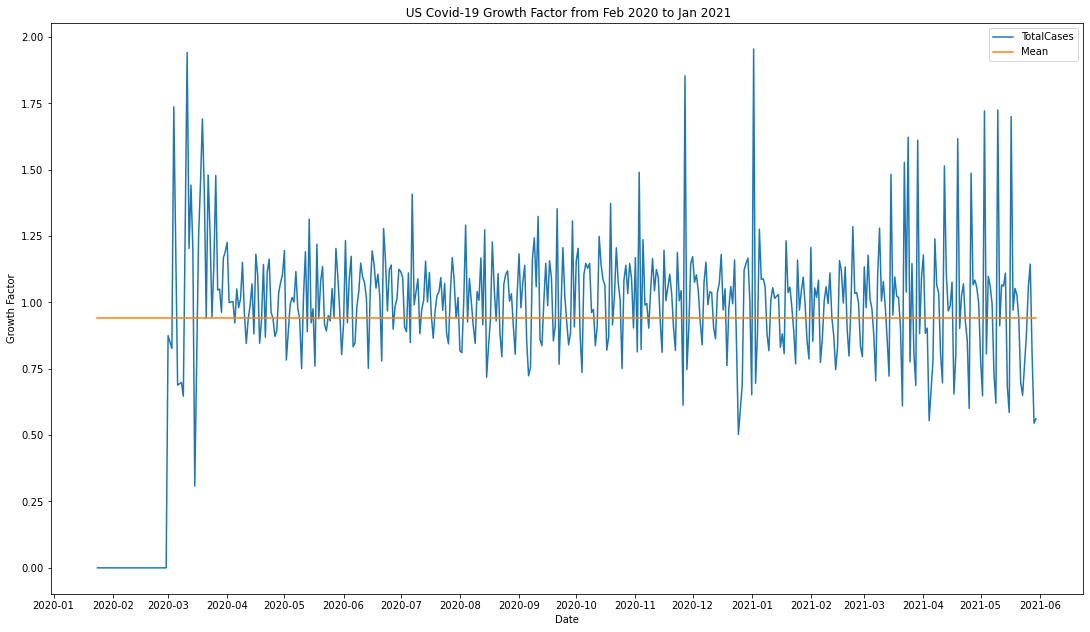

,Date,Cases,GrowthFactor,DailyCases,GrowthRatio
0,2020-01-22,1,NaN,NaN,NaN
1,2020-01-23,1,NaN,0,1
2,2020-01-24,2,0,1,2
3,2020-01-25,2,0,0,1
4,2020-01-26,5,0,3,2.5
...,...,...,...,...,...
490,2021-05-26,33190470,1.05695,24052,1.00073
491,2021-05-27,33217995,1.1444,27525,1.00083
492,2021-05-28,33239963,0.798111,21968,1.00066
493,2021-05-29,33251939,0.545157,11976,1.00036


In [4]:
new_list= df["Cases"]

factor_list=[]
# caculate growth factor
for i in range(len(new_list)):
    if i <= 1:
        factor_list.append("NaN")
    elif (new_list[i - 1] - new_list[i - 2]) == 0:
        factor_list.append(0)
    else:
        factor_list.append(( new_list[i] - new_list[i - 1] ) / (new_list[i - 1] - new_list[i - 2]))

new_list1= df["Cases"]

df["GrowthFactor"]= factor_list
ratio_list=[]
 
dailycaseslist=[]

for i in range(len(new_list1)):
    if i <= 0:
        dailycaseslist.append("NaN")
    else:
        dailycaseslist.append( new_list1[i] - new_list1[i - 1] ) 
# calculate Growth Ratio
        
df["DailyCases"]= dailycaseslist

for i in range(len(new_list1)):
    if i <= 0:
        ratio_list.append("NaN")
    elif (new_list1[i - 1]) == 0:
        ratio_list.append(0)
    else:
        ratio_list.append( new_list1[i] / new_list1[i - 1] )   




df["GrowthRatio"] =ratio_list
        

                  
df2 = df.iloc[2:] 

df2["GrowthFactor"]=df2["GrowthFactor"].astype(float)
                          

df2=df2[(df2["GrowthFactor"] < 2)]

df_mean = df2["GrowthFactor"].mean()

                          
list3=[]
for i in range(0,485):
    list3.append(df_mean)
                    
                          
                      
# growth factor by date graph, with mean growth factor                         
                          
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))



data_line = ax.plot(df2["Date"],df2["GrowthFactor"], label='TotalCases')

plt.xlabel("Date")
plt.title(" US Covid-19 Growth Factor from Feb 2020 to Jan 2021")
plt.ylabel("Growth Factor")
mean_line = ax.plot(df2["Date"],list3, label='Mean')
legend = ax.legend(loc='upper right')

plt.show()

df

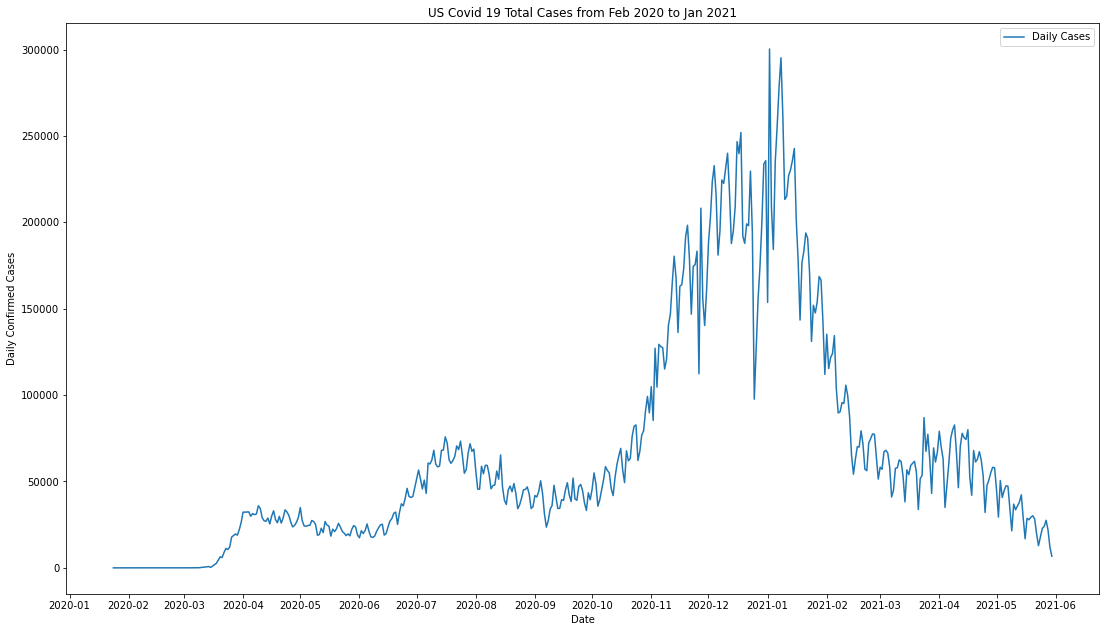

In [5]:
# Daily confirmed cases by date graph
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
data_line = ax.plot(df2["Date"],df2["DailyCases"], label='Daily Cases')

plt.xlabel("Date")
plt.title("US Covid 19 Total Cases from Feb 2020 to Jan 2021")
plt.ylabel("Daily Confirmed Cases")

legend = ax.legend(loc='upper right')

plt.show()



<ipython-input-6-c4e5cc4b95fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["GrowthRatio"]=df3["GrowthRatio"].astype(float)


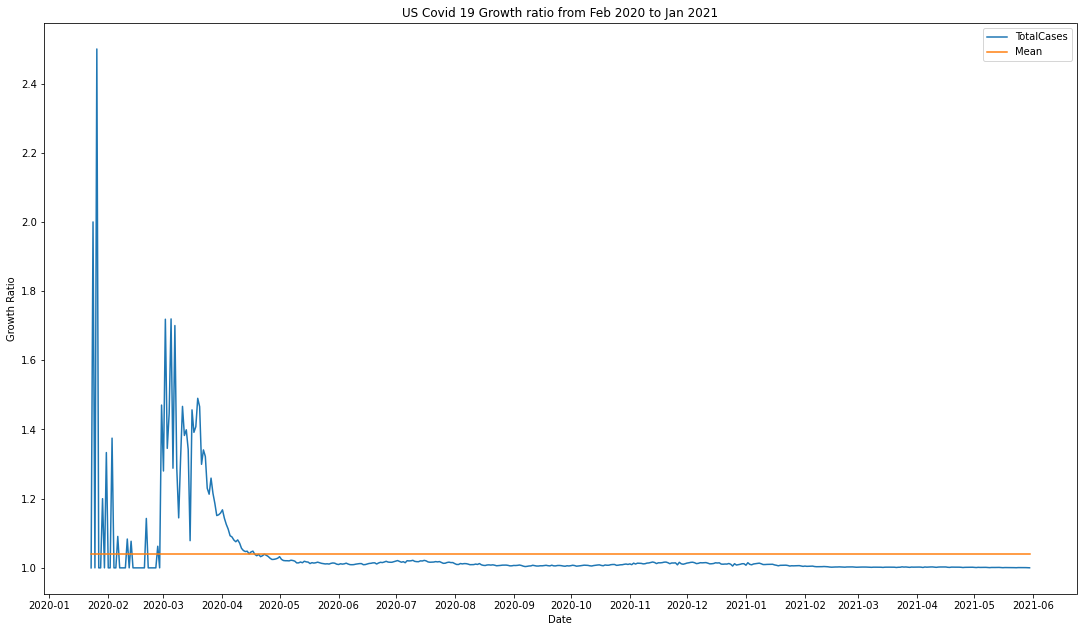

In [6]:
# growth ratio by date graph                 
df3 = df.iloc[1:] 

df3["GrowthRatio"]=df3["GrowthRatio"].astype(float)
df_meanratio = df3["GrowthRatio"].mean()
list1=[]

for i in range(0,494):
    list1.append(df_meanratio)




fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))



data_line1 = ax.plot(df3["Date"],df3["GrowthRatio"], label='TotalCases')

plt.xlabel("Date")
plt.title("US Covid 19 Growth ratio from Feb 2020 to Jan 2021")
plt.ylabel("Growth Ratio")
mean_line = ax.plot(df3["Date"],list1, label='Mean')
legend = ax.legend(loc='upper right')

plt.show()


# Linear Regression


[[0.75008635 0.00076093]]
0.10251917519382714


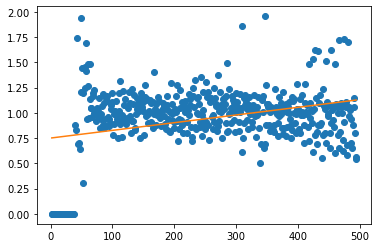

In [7]:


df2["intercept"]=1
df2['DaysPasses'] = df2.index - 0 
datamat=df2[["intercept" ,"DaysPasses"]].to_numpy() 
growth_label=df2[["GrowthFactor"]].to_numpy() 

from sklearn.linear_model import LinearRegression
linReg = LinearRegression(fit_intercept=False).fit(datamat,growth_label)
print(linReg.coef_)
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
plt.plot(datamat[:,1], growth_label, 'o')
m, b = 0.00076093,0.75008635
plt.plot(datamat[:,1], m*datamat[:,1]+b)


print(linReg.score(datamat,growth_label))



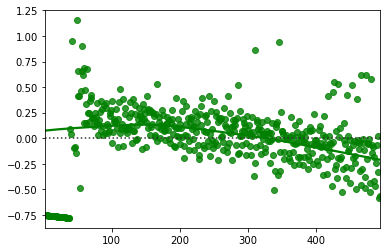

In [8]:
# residual plot
import seaborn as sns

sns.residplot(datamat[:,1], growth_label, lowess=True, color="g")


<ipython-input-9-1eb55d965d7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["intercept"]=1
<ipython-input-9-1eb55d965d7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DaysPasses'] = df3.index - 0


[[ 1.12593223e+00 -3.43292768e-04]]
-2.1283059498970434


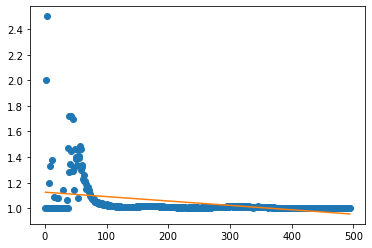

In [9]:


df3["intercept"]=1
df3['DaysPasses'] = df3.index - 0 
datamat1=df3[["intercept" ,"DaysPasses"]].to_numpy()
datamat1=df3[["intercept" ,"DaysPasses"]].to_numpy() 
ratio_label=df3[["GrowthRatio"]].to_numpy() 

from sklearn.linear_model import LinearRegression
linReg2 = LinearRegression(fit_intercept=False).fit(datamat1,ratio_label)
print(linReg2.coef_)
             
fig,ax = plt.subplots()
plt.plot(datamat1[:,1], ratio_label, 'o')
m, b = -3.43292768e-04, 1.12593223e+00
plt.plot(datamat1[:,1], m*datamat1[:,1]+b)

print(linReg.score(datamat1,ratio_label))

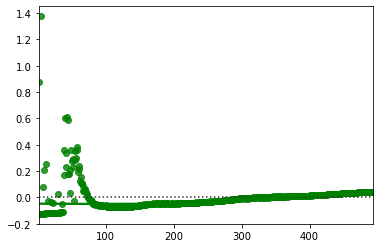

In [10]:
import seaborn as sns

sns.residplot(datamat1[:,1], ratio_label, lowess=True, color="g")


# Ridge Regression 

In [11]:
# split dateset 80% training and 20% test dataset
X_ratiotrain, X_ratiotest, y_ratiotrain, y_rtiotest = train_test_split(datamat1, ratio_label, test_size=0.2)
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
model_ratio1 = Ridge(alpha=1,  fit_intercept=False)
model_ratio1.fit(X_ratiotrain,y_ratiotrain)
scorerA=model_ratio1.score(X_ratiotrain,y_ratiotrain)
# predict via the test dataset
yhat = model_ratio1.predict(X_ratiotest)
# r2 via test dataseta and predicted y value
scre_r0=r2_score(y_rtiotest, yhat)
# mean square error
MSE2=mean_squared_error(y_rtiotest, yhat)

In [12]:
MSE2

0.004033354457212071

In [13]:
scre_r0

-0.05132940444662659

In [14]:
model_ratio1.coef_

array([[ 1.12850673e+00, -3.49673334e-04]])

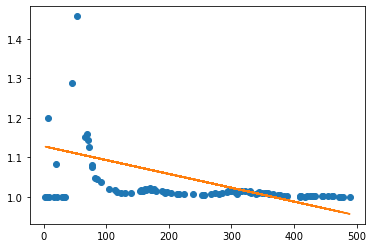

In [15]:
# Actual and predicted value plot for Ridge model
fig,ax = plt.subplots()
plt.plot(X_ratiotest[:,1], y_rtiotest,'o')

plt.plot(X_ratiotest[:,1], yhat, label="Predicted")

# Ridge Regression with Cross validation

In [16]:
from numpy import *
from sklearn.linear_model import RidgeCV, LassoCV
# ridgecv range 1-30
ridgeLM = RidgeCV(alphas=[exp(i-10) 
                          for i in range(30)], cv=10, fit_intercept=False)
ridgeLM.fit(X_ratiotrain,y_ratiotrain)
ratioScore=ridgeLM.score(X_ratiotrain,y_ratiotrain)
# predict via test dataset
yhatratiocv = ridgeLM.predict(X_ratiotest)
# r2 via the test data set
scre_r1=r2_score(y_rtiotest, yhatratiocv)
# mean square error
MSE2=mean_squared_error(y_rtiotest, yhatratiocv)

In [17]:
MSE2

0.003216557932673879

In [18]:
ridgeLM.coef_



array([[ 1.06017364e+00, -1.42930868e-04]])

In [19]:
scre_r1

0.1615758119945725

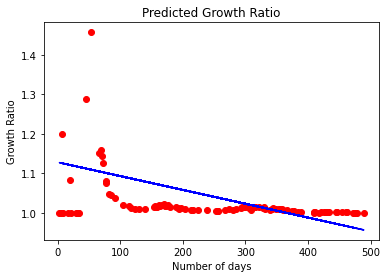

In [20]:
# actual and predicted value graph RidgeCV model
plt.scatter(X_ratiotest[:,1], y_rtiotest, color = 'red')
plt.plot(X_ratiotest[:,1], yhat, color = 'blue')

           
plt.title('Predicted Growth Ratio')
plt.xlabel('Number of days')
plt.ylabel('Growth Ratio')
           
plt.show()

# Ridge regression  confirmed cases by date

[[-6851833.90830855    78535.91846638]]
14956728865228.467


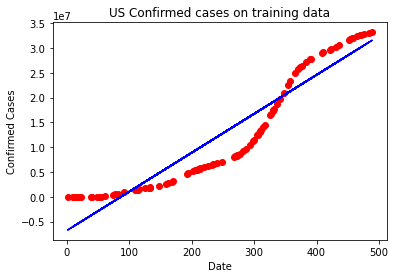

In [21]:
datamat3=df3[["intercept" ,"DaysPasses"]].to_numpy() 
cases_label=df3[["Cases"]].to_numpy() 


X_casestrain, X_casestest, y_casestrain, y_casestest = train_test_split(datamat3, cases_label, test_size=0.2)
model_cases = Ridge(alpha=10,  fit_intercept=False)
model_cases.fit(X_casestrain,y_casestrain)

yhatcases = model_cases.predict(X_casestest)
scre_r1=r2_score(y_casestest, yhatcases)
MSE2=mean_squared_error(y_casestest, yhatcases)

print(model_cases.coef_)
print(MSE2)

plt.scatter(X_casestest[:,1], y_casestest, color = 'red')
plt.plot(X_casestest[:,1], yhatcases, color = 'blue')

           
plt.title('US Confirmed cases on training data')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
           
plt.show()

# Ridge CV Total Confirmed cases by Date

In [22]:
from numpy import *
from sklearn.linear_model import RidgeCV, LassoCV
ridgeLM = RidgeCV(alphas=[exp(i-10) for i in range(30)], cv=10, fit_intercept=False)
ridgeLM.fit(X_casestrain,y_casestrain)
Pred_ridge_cv=ridgeLM.predict(X_casestest)
scre_r2=r2_score(y_casestest, Pred_ridge_cv)
MSE1=mean_squared_error(y_casestest, Pred_ridge_cv)

X_casestrain

array([[  1, 270],
       [  1, 349],
       [  1, 227],
       [  1,  34],
       [  1,  27],
       [  1, 257],
       [  1, 117],
       [  1, 379],
       [  1, 372],
       [  1, 217],
       [  1, 451],
       [  1,  90],
       [  1, 351],
       [  1, 373],
       [  1,  67],
       [  1, 473],
       [  1, 477],
       [  1, 190],
       [  1, 468],
       [  1, 450],
       [  1, 154],
       [  1,   1],
       [  1, 191],
       [  1, 230],
       [  1, 165],
       [  1, 290],
       [  1, 115],
       [  1, 111],
       [  1, 207],
       [  1,   5],
       [  1, 463],
       [  1, 344],
       [  1, 106],
       [  1,  63],
       [  1, 291],
       [  1, 406],
       [  1, 461],
       [  1, 469],
       [  1, 459],
       [  1, 153],
       [  1, 251],
       [  1, 150],
       [  1,   6],
       [  1, 402],
       [  1, 205],
       [  1, 487],
       [  1, 492],
       [  1,   8],
       [  1, 480],
       [  1, 100],
       [  1, 481],
       [  1, 185],
       [  1,

In [23]:
ridgeLM

RidgeCV(alphas=array([4.53999298e-05, 1.23409804e-04, 3.35462628e-04, 9.11881966e-04,
       2.47875218e-03, 6.73794700e-03, 1.83156389e-02, 4.97870684e-02,
       1.35335283e-01, 3.67879441e-01, 1.00000000e+00, 2.71828183e+00,
       7.38905610e+00, 2.00855369e+01, 5.45981500e+01, 1.48413159e+02,
       4.03428793e+02, 1.09663316e+03, 2.98095799e+03, 8.10308393e+03,
       2.20264658e+04, 5.98741417e+04, 1.62754791e+05, 4.42413392e+05,
       1.20260428e+06, 3.26901737e+06, 8.88611052e+06, 2.41549528e+07,
       6.56599691e+07, 1.78482301e+08]),
        cv=10, fit_intercept=False)

In [24]:
ridgeLM.coef_

array([[-7522858.80392302,    80565.28324954]])

In [25]:
ridgeLM.alpha_

0.1353352832366127

In [26]:
scre_r2

0.8832124823029366

In [27]:
MSE1

14891154576363.162

# ARIMA Model

In [95]:
# Augmented Dickey-Fuller Test
growthratio_array_train=df["GrowthRatio"]


from statsmodels.tsa.stattools import adfuller


print("p-value:", adfuller(growthratio_array_train[1:396].dropna())[1])

p-value: 0.10556357538502276


The output grether than the significance level of 0.05 so we fail to reject the null hypotesis, this series is not stationary and requires differencing

In [96]:
diff_1 = growthratio_array_train[1:396].diff().dropna()

print("p-value:", adfuller(diff_1.dropna())[1])

p-value: 3.7061315703536233e-07


The p-value now is below the significance level, indicating that the series is stationary. 

In [97]:
# autoarima function
from pmdarima.arima import auto_arima
import pmdarima as pmd



def arimamodel(timeseriesarray):

    autoarima_model = pmd.auto_arima(timeseriesarray, 

                              start_p=1, 

                              start_q=1,

                              test="adf",

                              trace=True)

    return autoarima_model

In [98]:
# ARIMA estimator on the training data
arima_model = arimamodel(growthratio_array_train[1:396])

arima_model.summary()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-718.308, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-378.797, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-686.756, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-644.375, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-380.797, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-718.034, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-717.131, Time=1.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-688.913, Time=0.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-713.111, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-716.893, Time=1.89 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-719.849, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-645.827, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-688.603, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-719.489, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  395
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 362.924
Date:                Mon, 21 Jun 2021   AIC                           -719.849
Time:                        21:13:13   BIC                           -707.920
Sample:                             0   HQIC                          -715.122
                                - 395                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5992      0.008    -72.262      0.000      -0.615      -0.583
ma.L1         -0.4207      0.022    -19.358      0.000      -0.463      -0.378
sigma2         0.0093      0.000     62.738      0.000       0.009       0.010
===================================================================================
Ljung-Box (Q):                       94.53   Jarque-Bera (JB):             40069.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -0.58
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

based on the above result, final model fitted was an ARIMA(1,1,2) estimator, 

In [99]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [100]:
# test prediction on test data
test_array=growthratio_array_train[397:494]
predicted = arima_model.predict(len(test_array))

predicted

array([1.00268396, 1.00260385, 1.00265185, 1.00262309, 1.00264032,
       1.00263   , 1.00263618, 1.00263248, 1.0026347 , 1.00263337,
       1.00263416, 1.00263369, 1.00263397, 1.0026338 , 1.0026339 ,
       1.00263384, 1.00263388, 1.00263386, 1.00263387, 1.00263386,
       1.00263387, 1.00263386, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263387,
       1.00263387, 1.00263387, 1.00263387, 1.00263387, 1.00263

In [101]:
mean_absolute_percentage_error(growthratio_array_train[397:494], predicted)

0.0933336734411851

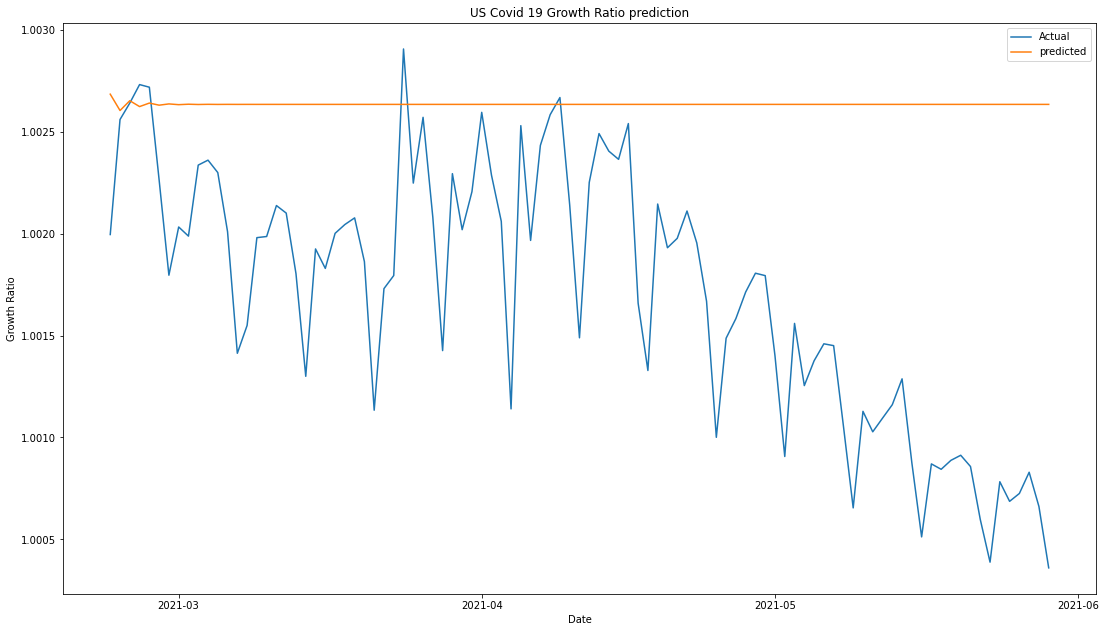

In [102]:
# plot predicted vs actual 
date_array=df["Date"]
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
actual_line = ax.plot(date_array[397:494],growthratio_array_train[397:494], label='Actual')
predicted_line = ax.plot(date_array[397:494],predicted, label='predicted')
plt.xlabel("Date")
plt.title("US Covid 19 Growth Ratio prediction")
plt.ylabel("Growth Ratio")

legend = ax.legend(loc='upper right')

plt.show()
